# Spatial Problem: In what cities will we be able to see upcoming solar eclipses?

An eclipse of the sun, or solar eclipse, happens when the moon moves between the sun and Earth. When this happens, the moon blocks the light of the sun from reaching Earth. There was a widely publicized solar eclipse that passed over the contiguous United States in 2017. Let's re-live the excitment by finding out where we can see solar eclipses in the future, using Python!

First we need to import our libraries

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import pandas as pd
import geopandas as gpd
#from geopandas import GeoSeries, GeoDataFrame

# new imports 
import os
data_pth = "../Data/"

Now to use some of our own data!

In [2]:
# Look in your Data directory to see this shapefile
eclipses = gpd.read_file(os.path.join(data_pth, "Eclipses.shp"))

In [3]:
# Let's see what we've got in tabular format
eclipses.head()

,OID_,Name,FolderPath,SymbolID,AltMode,Base,Clamped,Extruded,Snippet,PopupInfo,Shape_Leng,Shape_Area,Year,geometry
0,0,Umbra,TSE 2017.08.21/TSE 2017 August 21 Umbral Path,0,0,0.0,-1,0,None,None,303.633219,130.461081,2017,"POLYGON Z ((-171.57693 39.73810000000003 0, -1..."
1,0,Umbra,TSE 2019.07.02/TSE 2019 July 02 Umbral Path,0,0,0.0,-1,0,None,None,223.557661,165.607105,2019,"POLYGON Z ((-160.39845 -37.64846999999997 0, -..."
2,0,Umbra,TSE 2020.12.14/TSE 2020 December 14 Umbral Path,0,0,0.0,-1,0,None,None,310.979509,99.233931,2020,"POLYGON Z ((-132.81568 -7.773699999999963 0, -..."
3,0,Umbra,TSE 2021.12.04/TSE 2021 December 04 Umbral Path,0,0,0.0,-1,0,None,None,274.491359,757.922577,2021,POLYGON Z ((-51.18286999999998 -53.08708999999...
4,0,Umbra Limit (East),HSE 2023.04.20/HSE 2023 April 20 Umbral Path,0,0,0.0,-1,0,None,None,267.246357,31.230251,2023,POLYGON Z ((180.0000000000001 3.21677000000005...


In [4]:
# Another way to view tabular data is to transpose rows and columns
eclipses.head().T

,0,1,2,3,4
OID_,0,0,0,0,0
Name,Umbra,Umbra,Umbra,Umbra,Umbra Limit (East)
FolderPath,TSE 2017.08.21/TSE 2017 August 21 Umbral Path,TSE 2019.07.02/TSE 2019 July 02 Umbral Path,TSE 2020.12.14/TSE 2020 December 14 Umbral Path,TSE 2021.12.04/TSE 2021 December 04 Umbral Path,HSE 2023.04.20/HSE 2023 April 20 Umbral Path
SymbolID,0,0,0,0,0
AltMode,0,0,0,0,0
Base,0,0,0,0,0
Clamped,-1,-1,-1,-1,-1
Extruded,0,0,0,0,0
Snippet,None,None,None,None,None
PopupInfo,None,None,None,None,None


In [5]:
# Check the coordinate reference system of our data, its crs
eclipses.crs

{'init': 'epsg:4326'}

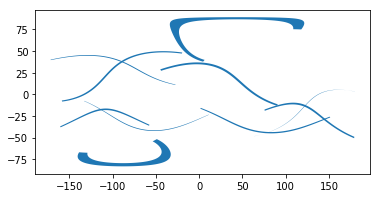

In [6]:
# Now we plot. Note that for simplicity and asthetics some eclipses were removed
# from the dataset or clipped if they crossed the International Date Line
eclipses.plot()

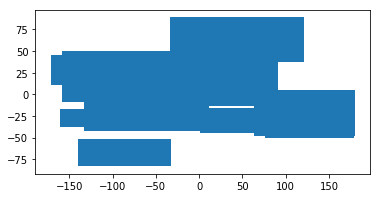

In [7]:
# Examine what the envelope of our data looks like. This comes in handy sometimes when you want to simplify
# your data, or if you want to zoom to a certain object's extent
eclipses.envelope.plot()

In [8]:
# We can examine number of shapes/records for each year
eclipses['Year'].value_counts()

2030    1
2028    1
2027    1
2026    1
2024    1
2023    1
2021    1
2020    1
2019    1
2017    1
Name: Year, dtype: int64

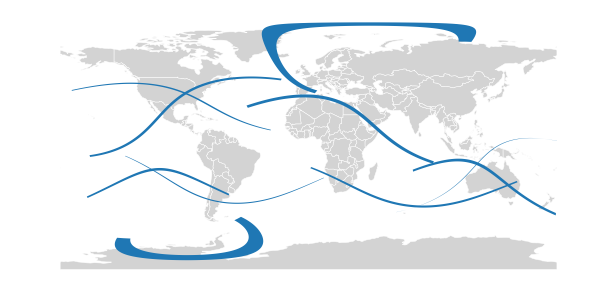

In [9]:
# Where exactly are these paths? Let's add our basemap to make this clear.
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
# Pass ax=ax to the second layer
eclipses.plot(ax=ax)
# There is an axis by default. You can see it if you comment out the below.
ax.set_axis_off()

In [10]:
# Let's load in the cities provided by geopandas. Note these are just the capitals.
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

(-197.99999999999994, 198.00000000000014, -98.95351100000003, 98.0237310000001)

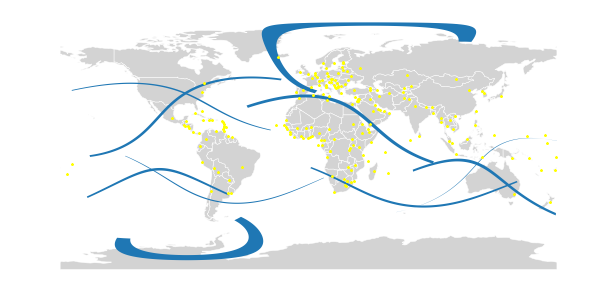

In [11]:
# Now we'll plot our basemap, our eclipse paths, and our cities
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
eclipses.plot(ax=ax)
cities.plot(marker='*', color='yellow', markersize=5, ax=ax)
ax.axis('off')

In [12]:
# But we want MORE cities, so let's use our own. This is a local shapefile in your data directory.
cities = gpd.read_file(os.path.join(data_pth, "ne_10m_populated_places.shp"))

In [13]:
cities.head().head()

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,DIFFASCII,NAMEASCII,ADM0CAP,...,wof_id,CAPALT,NAME_EN,NAME_DE,NAME_ES,NAME_FR,NAME_PT,NAME_RU,NAME_ZH,geometry
0,10,1,8,Admin-1 capital,Colonia del Sacramento,None,None,0,Colonia del Sacramento,0.0,...,421199749,NaN,Colonia del Sacramento,Colonia del Sacramento,Colonia del Sacramento,Colonia del Sacramento,Colônia do Sacramento,Колония-дель-Сакраменто,科洛尼亞德爾薩克拉門托,POINT (-57.84000247340134 -34.47999900541754)
1,10,1,8,Admin-1 capital,Trinidad,None,None,0,Trinidad,0.0,...,890444639,NaN,Trinidad,Trinidad,Trinidad,Trinidad,Trinidad,Тринидад,特立尼達,POINT (-56.90099656015872 -33.5439989373607)
2,10,1,8,Admin-1 capital,Fray Bentos,None,None,0,Fray Bentos,0.0,...,890451703,NaN,Fray Bentos,Fray Bentos,Fray Bentos,Fray Bentos,Fray Bentos,Фрай-Бентос,弗賴本托斯,POINT (-58.3039974719095 -33.1389990288435)
3,10,1,8,Admin-1 capital,Canelones,None,None,0,Canelones,0.0,...,890444649,NaN,Canelones,Canelones,Canelones,Canelones,Canelones,Канелонес,卡內洛內斯,POINT (-56.28400149324307 -34.53800400667546)
4,10,1,8,Admin-1 capital,Florida,None,None,0,Florida,0.0,...,890431207,NaN,Florida,Florida,Florida,Florida,Florida,Флорида,佛羅里達,POINT (-56.21499844799416 -34.09900200521719)


In [14]:
# Check the crs of our new cities data
cities.crs

{'init': 'epsg:4326'}

In [15]:
# Is the cities data still in the same crs as the eclipse data? Let's check.
eclipses.crs == cities.crs

True

(-198.38630091388424, 198.17962561808534, -99.64179619362255, 98.0565064854107)

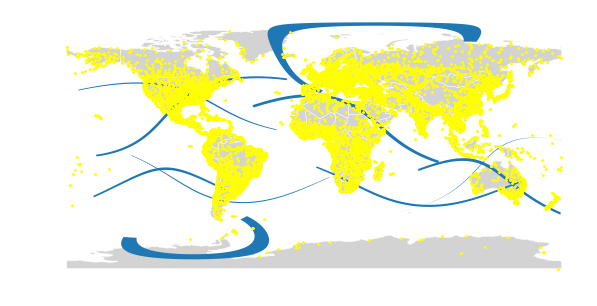

In [16]:
# Great. Let's plot it all again
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
eclipses.plot(ax=ax)
cities.plot(marker='*', color='yellow', markersize=5, ax=ax)
ax.axis('off')

(-198.38630091388424, 198.17962561808534, -99.64179619362255, 98.0565064854107)

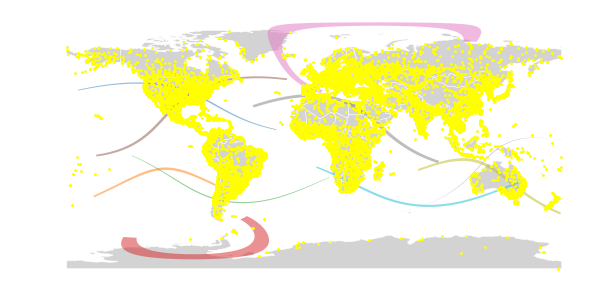

In [17]:
# Let's change our eclipse colors and transparency
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
eclipses.plot(ax=ax, cmap='tab10', alpha=0.5)
cities.plot(marker='*', color='yellow', markersize=5, ax=ax)
ax.axis('off')

In [18]:
# We can examine the years that we have data for
eclipses['Year']

0    2017
1    2019
2    2020
3    2021
4    2023
5    2024
6    2026
7    2027
8    2028
9    2030
Name: Year, dtype: int64

(-197.99999999999994, 198.00000000000014, -98.95351100000003, 98.0237310000001)

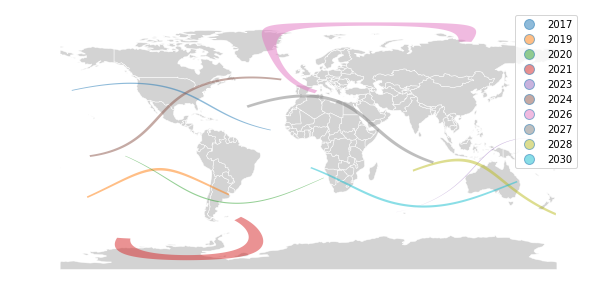

In [19]:
# But how do we know which is which?
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))

# We can add a catetorical value and set the column to Year. We can also add a legend.
eclipses.plot(ax=ax, cmap='tab10', categorical=True, alpha=0.5, column = "Year", legend=True)
ax.axis('off')

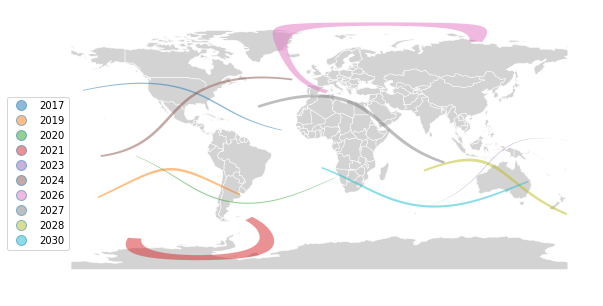

In [20]:
# Let's get that legend out of the way.
ax.get_legend().set_bbox_to_anchor((.05,.7))
ax.get_figure()

## Which eclipses will cover the largest population?

In [30]:
allecities = gpd.sjoin(cities, eclipses, how='inner', op='intersects')
allecities.T.head()

,12,13,15,454,455,457,519,520,793,795,...,6736,7286,7312,7318,7331,7334,3344,5561,4855,4856
SCALERANK,10,10,10,10,10,10,9,9,8,8,...,4,0,6,4,8,8,7,6,7,7
NATSCALE,1,1,1,1,1,1,5,5,10,10,...,50,600,30,50,10,10,20,30,20,20
LABELRANK,7,7,7,5,5,5,6,6,3,3,...,3,3,8,8,8,8,1,3,0,0
FEATURECLA,Admin-1 capital,Admin-1 capital,Admin-1 capital,Admin-1 capital,Admin-1 capital,Admin-1 capital,Admin-1 capital,Admin-1 capital,Populated place,Populated place,...,Populated place,Admin-1 capital,Populated place,Admin-1 capital,Populated place,Populated place,Populated place,Populated place,Scientific station,Scientific station
NAME,Kasserine,Sdid Bouzid,Mahdia,Bordj Bou Arréridj,M'sila,Oum el Bouaghi,'Ataq,Marib,Marbella,Algeciras,...,Dubbo,Sydney,Queenstown,Dunedin,Te Anau,Wanaka,Biak,Exmouth,Orcadas Station,Signy Research Station


### Robin: I'm trying to find out the populations covered by each eclipse, then style them in a plot based on that

In [31]:
allecities = pd.DataFrame(allecities[['POP_MAX', 'Year']])

In [32]:
allecities.head()

,POP_MAX,Year
12,76243,2027
13,42098,2027
15,45977,2027
454,140000,2027
455,150000,2027


In [33]:
eclipsepop = allecities.dissolve(by='Year', aggfunc='sum')

AttributeError: 'DataFrame' object has no attribute 'dissolve'

In [ ]:
eclipsepop['POP_MAX']

In [ ]:
eclipsepop.plot()

In [ ]:
list(eclipsepop.index)

In [ ]:
eclipses.head()

In [ ]:
print(eclipses.head())
print(eclipsepop.head())

In [ ]:
# PROBLEM
#eclipses = eclipses.join(eclipsepop, on='Year')
#allecities = gpd.sjoin(cities, eclipses, how='inner', op='intersects')
#eclipses = eclipses.join(cities, eclipses, how='left', on=['Year', 'geometry'])
pop_eclipses = pd.merge(eclipses, eclipsepop, how='left', on=['Year'])

## Are any eclipses passing over Cleveland?

We can find out by intersecting the cities with the eclipse paths, then seeing if Cleveland is in the result!

In [28]:
# We need to import something new, sjoin
# from geopandas.tools import sjoin

In [67]:
# Let's create a variable to just hold the Cleveland city point
mycity = cities.loc[cities['NAME'] == 'Cleveland']
mycity

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,DIFFASCII,NAMEASCII,ADM0CAP,...,wof_id,CAPALT,NAME_EN,NAME_DE,NAME_ES,NAME_FR,NAME_PT,NAME_RU,NAME_ZH,geometry
index_left,,,,,,,,,,,,,,,,,,,,,
6793,3,110,1,Populated place,Cleveland,None,None,0,Cleveland,0.0,...,101712563,NaN,Cleveland,Cleveland,Cleveland,Cleveland,Cleveland,Кливленд,克里夫蘭,POINT (-81.69694406998963 41.47193265371732)


In [106]:
# Now we can use sjoin and intersects to find out of Cleveland intersects any eclipse paths
emycity = gpd.sjoin(mycity, eclipses, how='inner', op='intersects')
# This code will tell us a nicely formatted answer

def eresult(city, eclipse):
    if len(city) > 0:
        return '{} eclipse(s) will pass through {}. Year(s): {}'.format(len(eclipse), list(city['NAME'])[0], [y for y in ecleve['Year']])
    else:
        return 'No eclipses passing through {}'.format(list(city['NAME'])[0])
    
eresult(mycity, emycity)

'1 eclipse(s) will pass through Albany. Year(s): [2024]'

In [82]:
# There is one! Let's assign that eclipse to a variable.
cleveland_eclipse = eclipses.loc[eclipses['Year'] == int(ecleve['Year'])]

(-13.450309999999945, 54.82445000000007)

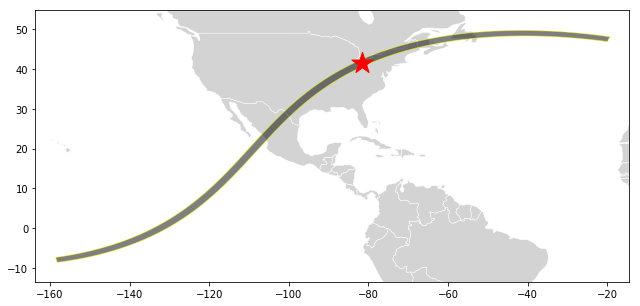

In [83]:
# Plot it!
ax = world.plot(color='lightgray', linewidth=0.5, edgecolor='white', figsize=(15,5))
cleveland_eclipse.plot(ax=ax, color='black', edgecolor='yellow', alpha=0.5, legend=True)
cleveland.plot(marker='*', color='red', markersize=500, ax=ax)
bounds = cleveland_eclipse.geometry.bounds

# Zoom to the bounds of the eclipse by setting the bounds to the min/max x/y of your layer
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5])

# Question - how do I get it to plot with bounds, and no axis without looking like this?
#plt.axis('off')

## Which Eclipse Do You Want to Map?

In [34]:
# Let's look at our options again
eclipses['Year']

index_right
0    2017
1    2019
2    2020
3    2021
4    2023
5    2024
6    2026
7    2027
8    2028
9    2030
Name: Year, dtype: int64

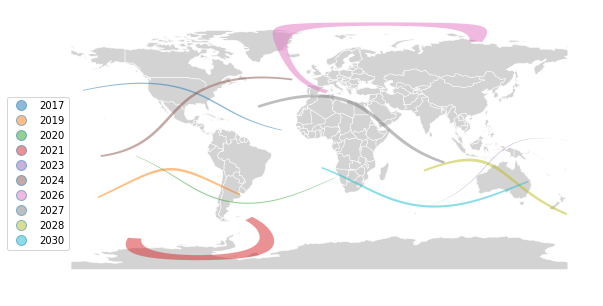

In [35]:
# And plot again
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
eclipses.plot(ax=ax, cmap='tab10', categorical=True, alpha=0.5, column = "Year", legend=True)
ax.axis('off')
ax.get_legend().set_bbox_to_anchor((.05,.7))

In [36]:
# I'll pick the one from 2017, it was on my birthday after all.
myeclipse = eclipses[(eclipses['Year'] == 2017)]

(-198.36062037118467, 198.1539450753859, -99.34968948168924, 92.3591690229376)

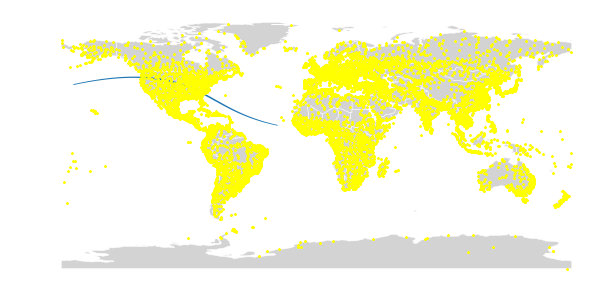

In [37]:
# Let's plot it 
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
myeclipse.plot(ax=ax)
cities.plot(marker='*', color='yellow', markersize=5, ax=ax)
ax.axis('off')

(5.781950000000052, 50.365410000000054)

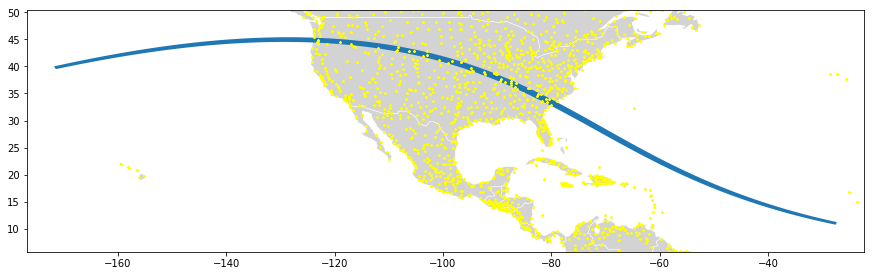

In [38]:
# Plot again, but this time I want to zoom in on my chosen eclipse path
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
myeclipse.plot(ax=ax)
cities.plot(marker='*', color='yellow', markersize=5, ax=ax)
bounds = myeclipse.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5])

(5.781950000000052, 50.365410000000054)

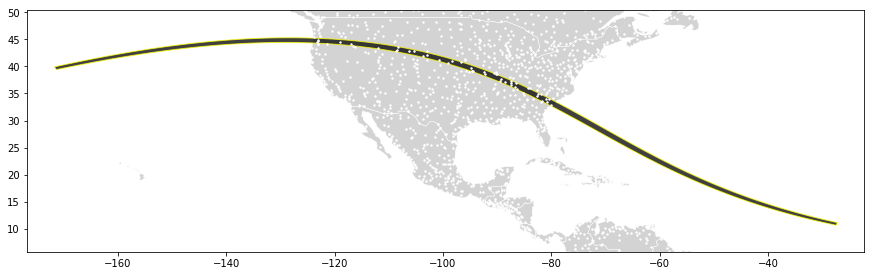

In [39]:
# Let's style the plot so that the eclipse looks eclipse-ier
ax = world.plot(color='lightgray', linewidth=0.5, edgecolor='white', figsize=(15,5))
myeclipse.plot(ax=ax, color='black', edgecolor='yellow', alpha=0.75)
cities.plot(marker='o', color='white', markersize=2, ax=ax)
bounds = myeclipse.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5])

In [ ]:
# Check that the crs are the same for myeclipse and cities
print('data is in the same crs:', myeclipse.crs == cities.crs, ':', myeclipse.crs)

In [40]:
# We can see that there are a few cities that intersect my path! But we want to know which ones.
# Do a spatial join to get the intersection
# from geopandas.tools import sjoin
ecities = gpd.sjoin(cities, myeclipse, how='inner', op='intersects')
ecities.head()

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,DIFFASCII,NAMEASCII,ADM0CAP,...,SymbolID,AltMode,Base,Clamped,Extruded,Snippet,PopupInfo,Shape_Leng,Shape_Area,Year
625,8,10,1,Populated place,Ontario,None,None,0,Ontario,0.0,...,0,0,0.0,-1,0,None,None,303.633219,130.461081,2017
629,8,10,1,Populated place,Lander,None,None,0,Lander,0.0,...,0,0,0.0,-1,0,None,None,303.633219,130.461081,2017
637,8,10,1,Populated place,Kansas City,None,None,0,Kansas City,0.0,...,0,0,0.0,-1,0,None,None,303.633219,130.461081,2017
643,8,10,1,Populated place,Independence,None,None,0,Independence,0.0,...,0,0,0.0,-1,0,None,None,303.633219,130.461081,2017
645,8,10,1,Populated place,Kearney,None,None,0,Kearney,0.0,...,0,0,0.0,-1,0,None,None,303.633219,130.461081,2017


(5.781950000000052, 50.365410000000054)

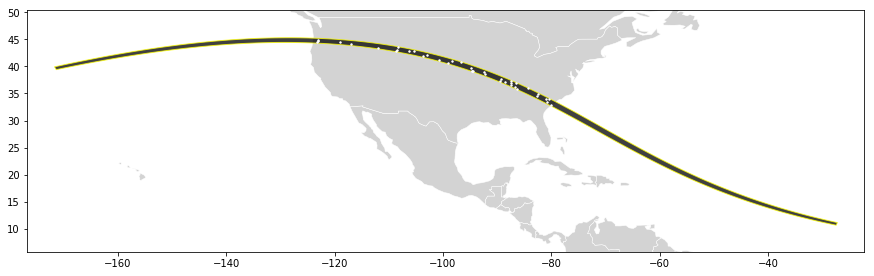

In [41]:
# Let's plot the results!
ax = world.plot(color='lightgray', linewidth=0.5, edgecolor='white', figsize=(15,5))
myeclipse.plot(ax=ax, color='black', edgecolor='yellow', alpha=0.75)
ecities.plot(marker='o', color='white', markersize=2, ax=ax)
bounds = myeclipse.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5])

In [42]:
print('Wow! There are {} cities in your path!'.format(len(ecities)))
print()
print(ecities['NAME'])

Wow! There are 39 cities in your path!

625            Ontario
629             Lander
637        Kansas City
643       Independence
645            Kearney
646       Grand Island
647           Alliance
716         Orangeburg
719     Cape Girardeau
731       Hopkinsville
733       Madisonville
1882          John Day
1884         Corvallis
1885            Albany
1898           Douglas
1899          Riverton
1900       Thermopolis
1925          Columbia
1926        St. Joseph
1929      North Platte
1931       Scottsbluff
2010        Greenville
2011            Sumter
2012          Anderson
2024        Carbondale
2032     Bowling Green
2033           Paducah
2045         Oak Ridge
2046      Murfreesboro
2047       Clarksville
4888    Jefferson City
5386       Idaho Falls
5404           Lincoln
5423        Charleston
6226             Salem
6227            Casper
6229       Kansas City
6247          Columbia
6795         Nashville
Name: NAME, dtype: object


# Make it slippy

In [ ]:
import folium

In [ ]:
# Let's find the centroid of the eclipse we chose, so that we can center our folum map on it
x = myeclipse.centroid.x.values[0]
y = myeclipse.centroid.y.values[0]
print('y: ' + str(y) + ', x: ' + str(x))

# Note: results will vary depending on the eclipse you chose

Let's choose a basemap! There are many options, [check them out](https://deparkes.co.uk/2016/06/10/folium-map-tiles/).

In [ ]:
# Note: no matter what projection you were in before, the folium maps will be in Web Mercator
map_osm = folium.Map(location=[y, x], zoom_start=3)
map_osm

In [ ]:
map_carto = folium.Map(
    location=[y, x],
    tiles='Cartodb Positron',
    zoom_start=3
)
map_carto

In [ ]:
map_stamen = folium.Map(
    location=[y, x],
    tiles='stamenwatercolor',
    zoom_start=3
)
map_stamen

In [ ]:
folium.GeoJson(ecities,name='Eclipse Cities').add_to(map_stamen)
folium.GeoJson(myeclipse,name='Eclipse Path').add_to(map_stamen)

# Add a layer control if you like
folium.LayerControl().add_to(map_stamen)

map_stamen

In [ ]:
# Saving your results as a Esri Shapefile is easy with GeoPandas
# myeclipse.to_file('../Data/myeclipse.shp', driver='ESRI Shapefile')
# ecities.to_file('../Data/ecities.shp', driver='ESRI Shapefile')

To Add:

* Which eclipse is most likely to have clear skies? (may need date and/or season data)
* Find the eclipse that will cover the largest population
* Make popups for points on slippy map